# 다중 선형회귀 - 보스톤 주택 가격

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- Feature별 산점도와 개별 회귀선

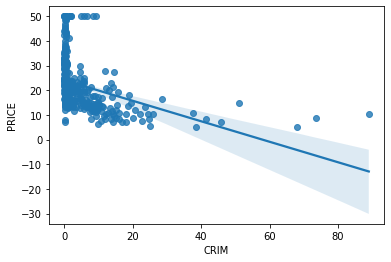

In [6]:
sns.regplot(x='CRIM', y='PRICE', data=df);

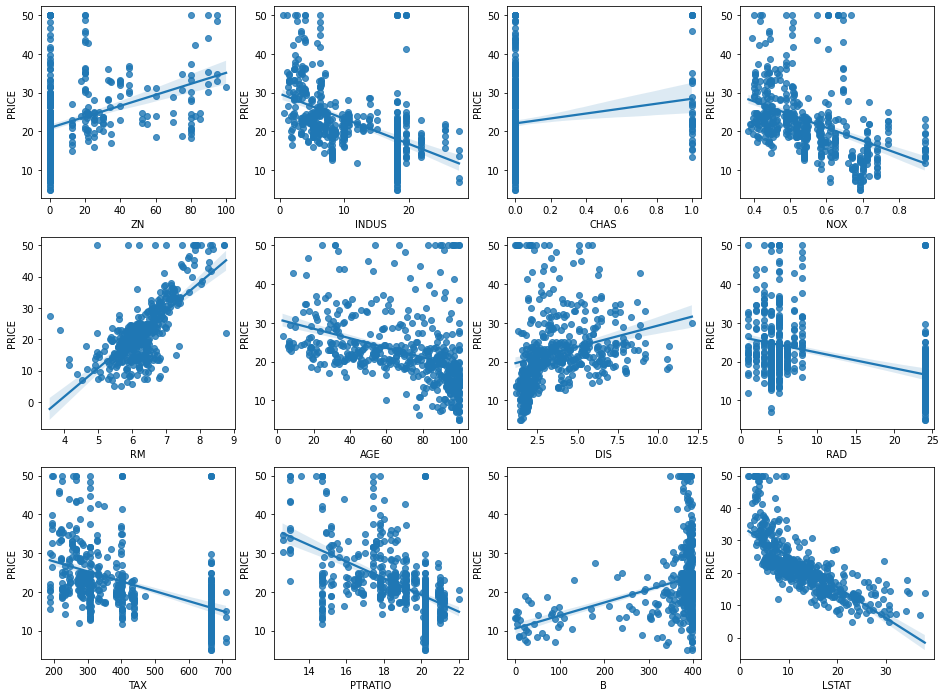

In [7]:
_, axs = plt.subplots(3, 4, figsize=(16,12))
for i, feature in enumerate(df.columns[1:-1]):
    row, col = i // 4, i % 4
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

- Feature 별 결정 계수(R squared)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
for feature in df.columns[:-1]:
    lr = LinearRegression()
    X = df[feature].values.reshape(-1,1)
    lr.fit(X, boston.target)
    score = lr.score(X, boston.target)
    print(f'{feature}: {score:.4f}')

CRIM: 0.1508
ZN: 0.1299
INDUS: 0.2340
CHAS: 0.0307
NOX: 0.1826
RM: 0.4835
AGE: 0.1421
DIS: 0.0625
RAD: 0.1456
TAX: 0.2195
PTRATIO: 0.2578
B: 0.1112
LSTAT: 0.5441


- 다중 선형회귀

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=2022
)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 13), (51, 13), (455,), (51,))

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
# R squared
lr.score(X_test, y_test)

0.6739859403280901

In [14]:
# 가중치
lr.coef_

array([-1.17731004e-01,  4.71909774e-02,  4.93242956e-02,  2.63851612e+00,
       -1.51441273e+01,  4.23531935e+00, -5.23740656e-03, -1.41099144e+00,
        2.91963685e-01, -1.19236187e-02, -8.95445411e-01,  9.80364965e-03,
       -5.27338430e-01])

In [15]:
# 절편, 바이어스
lr.intercept_

30.950814924201126

- 회귀식
<pre>y = -0.118 CRIM + 0.0472 ZN + 0.0493 INDUS + ... - 0.527 LSTAT + 30.95</pre>

- 테스트 데이터에 적용

In [16]:
X_test[0]

array([1.3960e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01,
       6.1670e+00, 9.0000e+01, 2.4210e+00, 5.0000e+00, 3.8400e+02,
       2.0900e+01, 3.9269e+02, 1.2330e+01])

In [17]:
np.dot(lr.coef_.reshape(1,-1), X_test[0].reshape(-1,1)) + lr.intercept_

array([[21.22753912]])

In [18]:
# y_hat = WX + b
np.dot(lr.coef_, X_test[0]) + lr.intercept_

21.227539118774818

In [19]:
# 모델의 예측치
lr.predict(X_test[0].reshape(1,-1))

array([21.22753912])

In [20]:
lr.predict(X_test[:1])

array([21.22753912])

- 10개의 테스트 데이터에 대해서 적용

In [22]:
for i in range(10):
    pred1 = np.dot(lr.coef_, X_test[i]) + lr.intercept_
    pred2 = lr.predict(X_test[i].reshape(1,-1))
    print(f'실제값: {y_test[i]},\t직접계산: {pred1:.4f},\t모델예측: {pred2[0]:.4f}')

실제값: 20.1,	직접계산: 21.2275,	모델예측: 21.2275
실제값: 11.9,	직접계산: 7.0638,	모델예측: 7.0638
실제값: 20.6,	직접계산: 21.4743,	모델예측: 21.4743
실제값: 33.2,	직접계산: 35.7832,	모델예측: 35.7832
실제값: 20.8,	직접계산: 18.2366,	모델예측: 18.2366
실제값: 13.5,	직접계산: 13.4321,	모델예측: 13.4321
실제값: 24.7,	직접계산: 24.7007,	모델예측: 24.7007
실제값: 13.9,	직접계산: 13.0563,	모델예측: 13.0563
실제값: 10.4,	직접계산: 6.3579,	모델예측: 6.3579
실제값: 19.7,	직접계산: 13.6734,	모델예측: 13.6734
